# Quiz

In [124]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# Streamlining workflows with pipelines

## Loading the Breast Cancer Wisconsin dataset

I. Load `breast cancer wisconsin` from one of below link:
- [breast cancer wisconsin](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)

- [breast cancer wisconsin](https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wdbc/wdbc.data)

Then print out the info of the data and first six rows of the data

In [125]:
url ='https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wdbc/wdbc.data'
df = pd.read_csv(url, header=None)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


II. Row with name `1` is the label, so using `sklearn` to encode the label to `0` and `1`

In [126]:
df[1]= LabelEncoder().fit_transform(df[1])
df[1]


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: 1, Length: 569, dtype: int64

III. Split the data to train and test set using `sklearn` with `test_size=0.2`

In [127]:
X = df.drop(1, axis=1)
y = df[1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)


## Combining transformers and estimators in a pipeline

IV. Using pipeline in `sklearn` to stack the data pipeline including `StandardScaler`, `PCA` and using `LogisticRegression` to build the ML model. Then compute and print out the test accuracy

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [129]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)



In [130]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)
reg.score(X_test, y_test)

0.956140350877193

# Using k-fold cross validation to assess model performance

V. Using the same pipeline as above but for the case of using also cross validation (cv) in `sklearn`. Then calculate and print out cv accuracy and confident interval of the cv accuracy

Hint: use `cross_val_score`

In [131]:
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h
mean, lower, higher = mean_confidence_interval(cross_val_score(reg,X_train,y_train, cv=10))
print("Mean:", mean)
print("lower:", lower)
print("higher:", higher)

Mean: 0.9495169082125603
lower: 0.9313802905506973
higher: 0.9676535258744233


<br>
<br>

# Debugging algorithms with learning curves

## Diagnosing bias and variance problems with learning curves

VI. Calculate the train and test scores of the model using `learning_curve` from `sklearn`. Next, compute the mean and std of train and test scores respectively. Then, plot the accuracy curves of the model in both train and test set of various sizes.

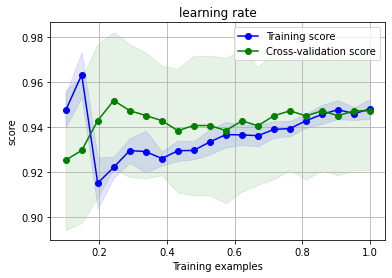

In [132]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes =np.linspace(0.1, 1.0, 20)
plt.figure()
plt.title('learning rate')
plt.xlabel('Training examples')
plt.ylabel('score')
train_sizess, train_scores, test_scores = learning_curve(reg, X_train,y_train, cv =10, n_jobs=1,
                                                         train_sizes=train_sizes )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
          label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Cross-validation score")

plt.legend(loc="best")

<br>
<br>